<a href="https://colab.research.google.com/github/thomouvic/txtanalytics/blob/main/CreateDFforHSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/thomouvic/txtanalytics/raw/main/txts.zip
!unzip -q txts.zip

--2022-11-26 16:48:19--  https://github.com/thomouvic/txtanalytics/raw/main/txts.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/thomouvic/txtanalytics/main/txts.zip [following]
--2022-11-26 16:48:19--  https://raw.githubusercontent.com/thomouvic/txtanalytics/main/txts.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3274958 (3.1M) [application/zip]
Saving to: ‘txts.zip’

txts.zip            100%[===================>]   3.12M  --.-KB/s    in 0.07s   

2022-11-26 16:48:19 (46.5 MB/s) - ‘txts.zip’ saved [3274958/3274958]



In [12]:
# Retrieve the filenames.

from pathlib import Path

all_filenames =[]
for file in Path("./txts/").rglob("*.txt"):
  # print(file)
  all_filenames.append(file.parent / file.name)

all_filenames.sort()

print( len(all_filenames) )
print(all_filenames)


130
[PosixPath('txts/03_Jensen_Its-not-Personal_WJS_Vol13_No-2_Fall-2017_pp-140-166.txt'), PosixPath('txts/ACH-ALL-2005-Conference-Proceedings.txt'), PosixPath('txts/Abstract.txt'), PosixPath('txts/Arbuckle-2020-How-Can-We-Broaden-and-Diversify-Humanities-Knowledge-Translation.txt'), PosixPath('txts/Arbuckle-Christie-Siemens_IntroductionSRC7.2_11-15-16.txt'), PosixPath('txts/Arbuckle-Christie_Intersections-Between_SRC_10-26-15.txt'), PosixPath('txts/Arbuckle-Crompton-Mauro_SRC-intro_Dec14.txt'), PosixPath('txts/Arbuckle-Mauro-Siemens_Intro-Sydney-Whistler_SRC_Oct2015.txt'), PosixPath('txts/Arbuckle-and-Maxwell-2019-Modelling-Open-Social-Scholarship-Within-the-INKE-Community.txt'), PosixPath('txts/Arbuckle-et-al-2014-Social-Knowledge-Creation.txt'), PosixPath('txts/Arbuckle-et-al-2019-Introduction-Beyond-Open-Implementing-Social-Scholarship.txt'), PosixPath('txts/Arbuckle-et-al-2019-Introduction-Open-Scholarship-in-Action.txt'), PosixPath('txts/Arbuckle-et-al-2020-Introduction-Open-Scho

In [ ]:
# Create a pandas dataframe with docname and text as columns.  

import pandas as pd

all_docs = [open(f).read() for f in all_filenames]

# A: store docnames to a pandas frame, then to a csv file
df = pd.DataFrame({'docname':all_filenames, 'text': all_docs})
df['docid'] = df.index
df.to_csv('docs.csv', index=False)

# print(df.iloc[0,0], df.iloc[0,1])

In [18]:
df['length'] = df['text'].str.len()

df[ ['length'] ].describe().T

,count,mean,std,min,25%,50%,75%,max
length,130.0,70928.215385,146387.165565,1.0,22894.0,36793.0,61917.25,1219398.0


<Figure size 576x144 with 0 Axes>

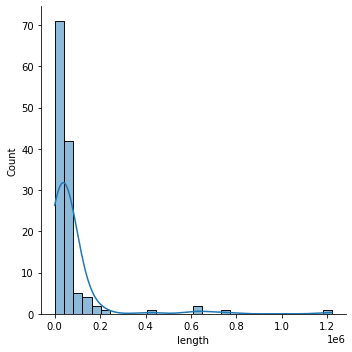

In [27]:
# Not in book: seaborn plot with gaussian kernel density estimate
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
sns.displot(df['length'], bins=30, kde=True);

# The histogram shows the distribution of the document lengths in HSS Commons. 
# We see that many docs are are less than 0.1*10^6 characters long.  
# The average English word is 4.7 characters long. 
# So, we have that many docs are are less than 0.1*10^6/4.7 = 21,276 words long. 
# Few docs are quite long. See the tail of the distribution. One of these docs
# is conference proceedings, Abstract.txt   

# Blueprint: Building a Simple Text Preprocessing Pipeline

## Tokenization with Regular Expressions

In [29]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [30]:
# This is just a small usage example.

text = "Let's defeat SARS-CoV-2 together in 2020!"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-CoV-2|together|in


In [32]:
import nltk
# not in book: make sure stop words are available
nltk.download('stopwords')

stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

## Processing a Pipeline with one Line of Code

In [34]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [36]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [37]:
df['num_tokens'] = df['tokens'].map(len)

<Figure size 576x144 with 0 Axes>

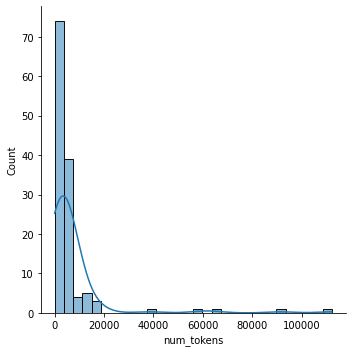

In [38]:
# Histogram based on number of tokens.

plt.figure(figsize=(8, 2))
sns.displot(df['num_tokens'], bins=30, kde=True);

# Blueprints for Word Frequency Analysis

## Blueprint: Counting Words with a Counter

In [44]:
# Just a small example 

from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")

counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [45]:
more_tokens = tokenize("She likes dogs and cats.")
counter.update(more_tokens)
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [46]:
# Counting tokens as before in HSS, but using the Counter class

from collections import Counter

counter = Counter()

# Call counter.update for each row of the column tokens. 
# Counter will be updated each time. 
_ = df['tokens'].map(counter.update) 

In [40]:
df['tokens']

0      [personal, modernist, remediations, william, j...
1      [association, computers, humanities, associati...
2      [abstract, thesis, argues, rise, sincerity, do...
3      [pop, broaden, diversify, humanities, knowledg...
4      [introduction, new, knowledge, models, sustain...
                             ...                        
125    [pop, foundations, canadian, humanities, socia...
126    [vol, http, www, eludamos, org, making, sense,...
127    [apex, hipster, xml, geekdom, tei-encoded, dyl...
128    [care-ful, reviewer, peer, review, people, mat...
129    [ursula, k, le, guin, dispossessed, künstlerro...
Name: tokens, Length: 130, dtype: object

In [43]:
print(counter.most_common(5))

[('de', 7175), ('research', 6464), ('et', 4681), ('digital', 4408), ('la', 4065)]


In [49]:
from collections import Counter ###
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [50]:
freq_df = count_words(df)
freq_df.head(5)

,freq
token,
de,7175
research,6464
et,4681
digital,4408
la,4065


In [55]:
# top words with 10+ characters
count_words(df, column='text', 
            preprocess=lambda text: re.findall(r"\w{10,}", text)).head(15)

,freq
token,
University,2248
Humanities,1704
humanities,1620
information,1344
Communication,1331
scholarship,1101
electronic,957
collaboration,939
development,860


## Blueprint: Creating a Frequency Diagram

[Text(0, 0.5, 'Token'), Text(0.5, 0, 'Frequency'), Text(0.5, 1.0, 'Top Words')]

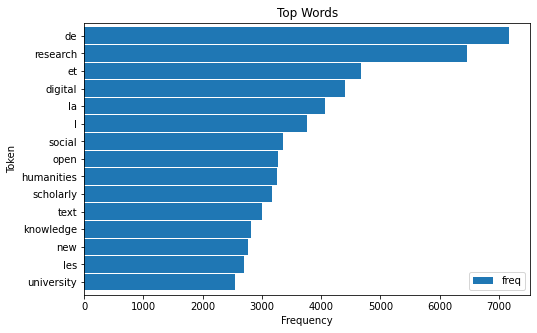

In [54]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(8,5))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

## Blueprint: Creating Word Clouds